# 과제 001

주어진 함수를 이용하여 gradient descent 를 직접 구현하고 그래프를 그리시오.


**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```
def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
```

* 힌트: 교과서 44p를 **참고**

result k=336: f(2.250152587890625)=-6.542968514237657
[f(0), f(9/4), f(-2), f(4)]= [2, -6.54296875, 42, 66]


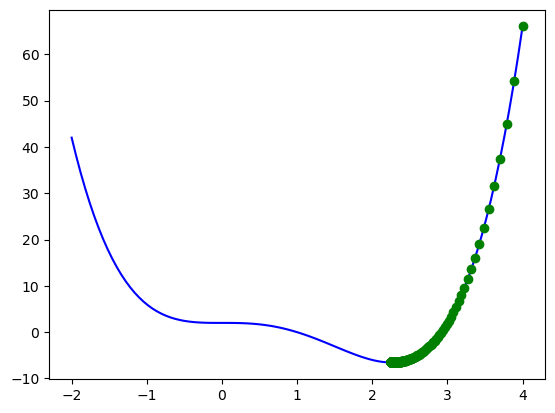

In [4]:
## 경사하강법 구현, 그래프 그리기
import tensorflow as tf
import wrapt
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**4 - 3*x**3 +2

def fprime(x):
    h = 0.001
    return (f(x+h) - f(x))/h
# 조건
k = 0 # 반복 횟수 초기화
mi = 1000 # 최대 반복학습률
lr = 0.001 # 반복 학습률
tol = 1e-5 # 허용오차 크기(종료조건)

xb = 0.0 # 변경 전 x값
xa = 4.0  # 변경 후 x값
xlist= [xa]  # x 값 저장
x = tf.Variable(xa, dtype = tf.float32) # 변수 생성 및 초깃값 설정

while abs(xb-xa)>tol and  k < mi:
    k+=1
    xb= x.numpy() # x 값을 Numpy 배열로 변환
    st = lr * fprime(x)
    x.assign_sub(st, read_value=False) # 값 업데이트(x값 읽지 않음)
    xa= x.numpy()
    xlist.append(xa)

print('result','k={}: f({})={}'.format(k, xa, f(xa)))
print("[f(0), f(9/4), f(-2), f(4)]=", [f(0), f(9/4), f(-2), f(4)])
# 그래프 그리기
# f(X)
xs = tf.linspace(-2.0, 4.0, num = 101) # Tensor  
ys = f(xs)
plt.plot(xs, ys,  'b-')

# 결과 값
xlist =tf.constant(xlist, dtype=tf.float32)  # Tensor
y_list = f(xlist) 
plt.plot(xlist, y_list, 'go')
plt.show()



# 과제 002

주어진 보스톤 주택 가격 데이터 셋을 이용하여 주택 가격을 예측하는 multiple variables regression 을 수행하는 프로그램을 직접 작성하시오.

단, 아래 조건을 만족하여 구현하시오.

* loss 함수: tensorflow 의 MSE
* gradient 계산: tensorflow의 GradientTape()
* optimizer: tensorflow의 Adam

**제출**

구현한 코드가 담긴 colab 파일을 PLATO "텐서플로 과제 제출 01"에 제출하세요. (23/7/6까지)

```python
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113
)
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

all_train_data = np.hstack((x_train, y_train.reshape((-1, 1))))
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.DataFrame(all_train_data, columns=column_names)
df.head()
sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')
```

* 힌트:
https://dschloe.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/

57026/57026 [==============================] - 0s 0us/step
x_train.shape y_train.shape (404, 13) (404,)
Epoch 1/50
65/65 [==============================] - 1s 3ms/step - loss: 0.6619 - val_loss: 0.6251
Epoch 2/50
65/65 [==============================] - 0s 1ms/step - loss: 0.4015 - val_loss: 0.4158
Epoch 3/50
65/65 [==============================] - 0s 1ms/step - loss: 0.2907 - val_loss: 0.3731
Epoch 4/50
65/65 [==============================] - 0s 1ms/step - loss: 0.2461 - val_loss: 0.2934
Epoch 5/50
65/65 [==============================] - 0s 1ms/step - loss: 0.2232 - val_loss: 0.2904
Epoch 6/50
65/65 [==============================] - 0s 1ms/step - loss: 0.1927 - val_loss: 0.2674
Epoch 7/50
65/65 [==============================] - 0s 1ms/step - loss: 0.1705 - val_loss: 0.2320
Epoch 8/50
65/65 [==============================] - 0s 1ms/step - loss: 0.1501 - val_loss: 0.2386
Epoch 9/50
65/65 [==============================] - 0s 1ms/step - loss: 0.1504 - val_loss: 0.2170
Epoch 10/50
65

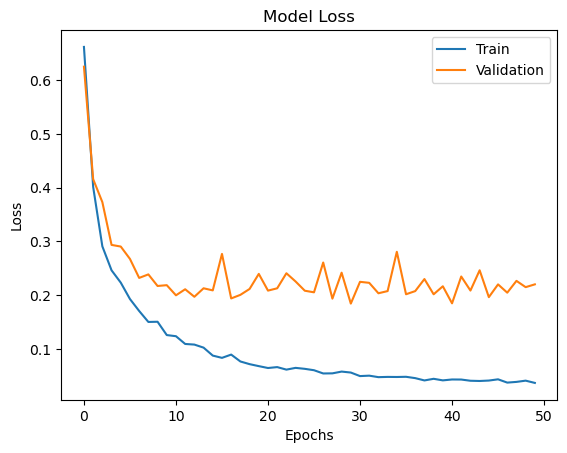

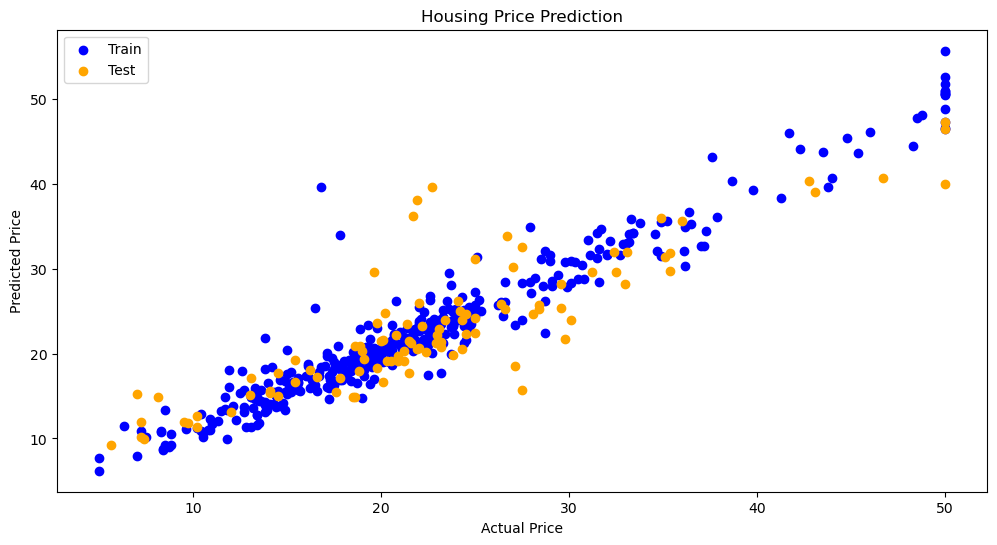

In [5]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow.python.keras as keras
from tensorflow.python.keras import layers
from sklearn.metrics import r2_score

# https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data
# features 설명 (http://lib.stat.cmu.edu/datasets/boston)
# 보스톤 주택 가격(MEDV) 예측 (1인당 범죄율, 주택당 평균 방 개수, 학생대 교사 비율 등의 features 이용함)
# MEDV(주택 가격 중앙값, 단위: $1,000)

## x_train = 독립 변수 dataset , y_train = 종속 변수 dataset(MEDV(주택가격 중앙값))
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.boston_housing.load_data(
    path='boston_housing.npz', test_split=0.2, seed=113 
) # train_test_split ; 8:2
print('x_train.shape', 'y_train.shape', x_train.shape, y_train.shape)

## .hstack() = np array 수평으로 결합 -> 주어진 배열을 좌우로 연결해 새로운 배열 형성
all_train_data = np.hstack((x_train, y_train.reshape((-1, 1)))) #reshape() 활용해 2차원 배열로 변환(-1 ; 차원의 크기 자동지정)

## column name setting
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

## DataFrame으로 변환
df = pd.DataFrame(all_train_data, columns=column_names)
df.describe() # 기술 통계량 확인

## nomalization
x_mean = x_train.mean(axis=0)
x_std = x_train.std(axis=0)
x_train -= x_mean
x_train /= x_std
x_test -= x_mean
x_test /= x_std

y_mean = y_train.mean(axis=0)
y_std = y_train.std(axis=0)
y_train -= y_mean
y_train /= y_std
y_test -= y_mean
y_test /= y_std

# model train
model = keras.Sequential([
    ## input layer(input_shape은 입력층에만 추가
    layers.Dense(units=16, activation='relu',input_shape=(13,)), ##input_shape ; 종속변수 하나를 제외한 feature의 갯수
    ## hidden layers
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    ## ouput layer(주택 가격을 하나의 값으로 예측하므로 뉴런수 = 1로 지정)
    layers.Dense(units=1) ## 출력층에 활성화 함수를 따로 지정하지 않으면 linear 함수가 적용(회귀문제에서 사용되는 일반적인 방법)
    ])

# model compile
# optimizer : 모델의 가중치 업데이트 방법 정의, loss : 모델의 성능을 평가, metrics : 모델의 성능을 평가하는데 사용되는 metric의 리스트)
model.compile(optimizer='adam', loss='mse')
# model.summary()

# model fitting
# (feature_data, target_data, epochs(전체 데이터셋을 학습하는데 사용되는 에포크 수),batch_size(한 번에 처리되는 샘플의 갯수))
history = model.fit(x_train, y_train, epochs=50, batch_size=5, validation_split=0.2)


y_pred_train = model.predict(x_train) * y_std + y_mean
y_pred_test = model.predict(x_test) * y_std + y_mean

## model 정확도 확인
# R-squared 계산
train_r2 = r2_score(y_train * y_std + y_mean, y_pred_train)
test_r2 = r2_score(y_test * y_std + y_mean, y_pred_test)

## 정확도 출력
print("Train 정확도: ", train_r2)
print("Test 정확도 : ", test_r2)

# loss func
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

# 집값 예측 그래프
plt.figure(figsize=(12, 6))
plt.scatter(y_train * y_std + y_mean, y_pred_train, label='Train', color='blue')
plt.scatter(y_test * y_std + y_mean, y_pred_test, label='Test', color='orange')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Housing Price Prediction')
plt.legend()
plt.show()
# sns.pairplot(df[['CRIM', 'ZN', 'INDUS', 'TAX', 'MEDV']], diag_kind='kde')